# 1. Understanding the problem space

In [1]:
import boto3
import pandas as pd
import numpy as np
import fastparquet
import matplotlib.pyplot as plt
import subprocess
import seaborn as sns

In [2]:
bucket_name = 'zrive-ds-data'
keys = ['groceries/sampled-datasets/orders.parquet', 'groceries/sampled-datasets/regulars.parquet', 'groceries/sampled-datasets/inventory.parquet', 'groceries/sampled-datasets/users.parquet']
local_file_paths = ['/home/ebacigalupe/zrive-ds/zrive-ds/orders.parquet', '/home/ebacigalupe/zrive-ds/zrive-ds/regulars.parquet', '/home/ebacigalupe/zrive-ds/zrive-ds/inventory.parquet', '/home/ebacigalupe/zrive-ds/zrive-ds/users.parquet']
datasets = ['orders', 'regulars', 'inventory', 'users']

for key, local_file_path, dataset in zip(keys, local_file_paths, datasets):
    s3 = boto3.client('s3', aws_access_key_id=access_key_id, aws_secret_access_key=secret_access_key)
    s3.download_file(bucket_name, key, local_file_path)
    df = pd.read_parquet(local_file_path)
    globals()[f"{dataset}_df"] = df


Abandoned_cart seems not to be available

In [6]:
s3 = boto3.client('s3', aws_access_key_id=access_key_id, aws_secret_access_key=secret_access_key)

bucket_name = 'zrive-ds-data'
key = 'groceries/sampled-datasets/abandoned_cart.parquet'  
local_file_path = '/home/ebacigalupe/zrive-ds/zrive-ds/abandoned_cart.parquet'  

# Download the Parquet file from S3 to the local file path
s3.download_file(bucket_name, key, local_file_path)

# Read the Parquet file into a DataFrame
abandoned_cart_df = pd.read_parquet(local_file_path)

# Now you have the 'orders' DataFrame ready to use
print(abandoned_cart_df.head())

ClientError: An error occurred (404) when calling the HeadObject operation: Not Found

### 1. Do all the quick checks and find any potential issues with the data. Fix them as you see fit

In [7]:
print("ORDERS")
print('1. Shape and size of orders_df \n{}: {}'.format(orders_df.shape, ', '.join(orders_df.columns)), f"\n")

print(f"2. Null values and data types: \n")
null_values = orders_df.info()

unique_users = len(orders_df['user_id'].unique())
unique_orders = len(orders_df['id'].unique())

print(f"\n", f"3. Total of {unique_orders}", f"orders made by {unique_users}", "unique users")

ORDERS
1. Shape and size of orders_df 
(8773, 6): id, user_id, created_at, order_date, user_order_seq, ordered_items 

2. Null values and data types: 

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[ns]
 3   order_date      8773 non-null   datetime64[ns]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 479.8+ KB

 3. Total of 8773 orders made by 4983 unique users


In [8]:
print("REGULARS")
print('1. Shape and size of regulars_df \n{}: {}'.format(regulars_df.shape, ', '.join(regulars_df.columns)), f"\n")

print(f"2. Null values and data types: \n")
null_values = regulars_df.info()

unique_users = len(regulars_df['user_id'].unique())
unique_items = len(regulars_df['variant_id'].unique())

print(f"\n", f"3. Total of {unique_items}", f"unique items regularly bought by {unique_users}", "unique users")


REGULARS
1. Shape and size of regulars_df 
(18105, 3): user_id, variant_id, created_at 

2. Null values and data types: 

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 565.8+ KB

 3. Total of 1843 unique items regularly bought by 1448 unique users


In [119]:
print("INVENTORY")
print('1. Shape and size of inventory_df \n{}: {}'.format(inventory_df.shape, ', '.join(inventory_df.columns)), f"\n")

print(f"2. Null values and data types: \n")
null_values = inventory_df.info()

unique_product_type = len(inventory_df['product_type'].unique())
unique_items = len(inventory_df['variant_id'].unique())

print(f"\n", f"3. Total of {unique_items}", f"unique items among {unique_product_type}", "unique categories")

INVENTORY
1. Shape and size of inventory_df 
(1733, 6): variant_id, price, compare_at_price, vendor, product_type, tags 

2. Null values and data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB

 3. Total of 1733 unique items among 59 unique categories


In [9]:
print("USERS")
print('1. Shape and size of users_df \n{}: {}'.format(users_df.shape, ', '.join(users_df.columns)), f"\n")

print(f"2. Null values and data types: \n")
null_values = users_df.info()

unique_users = len(users_df['user_id'].unique())
unique_segments = len(users_df['user_segment'].unique())

print(f"\n", f"3. Total of {unique_users}", f"unique users among {unique_segments}", "unique segments")

USERS
1. Shape and size of users_df 
(4983, 10): user_id, user_segment, user_nuts1, first_ordered_at, customer_cohort_month, count_people, count_adults, count_children, count_babies, count_pets 

2. Null values and data types: 

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage

### 2. Understand the problem at hand through data interrogation and hypothesis testing.

ORDERS:
1. Daily orders

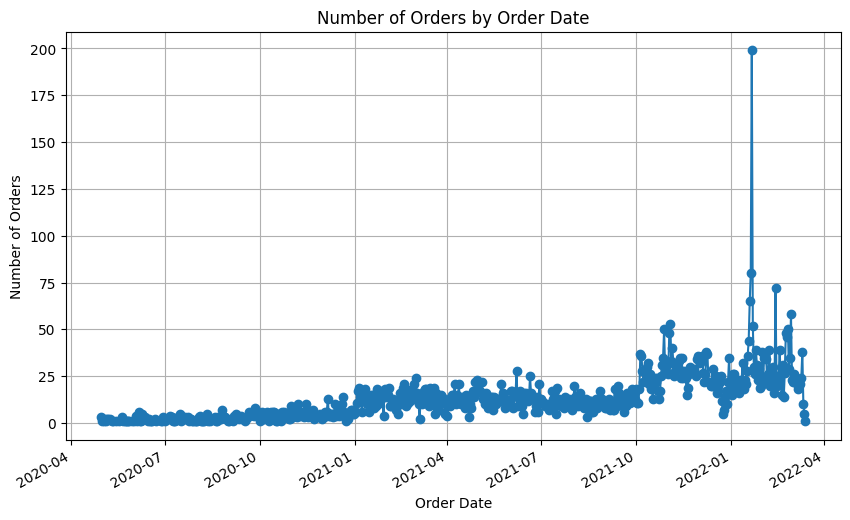

In [10]:
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])
orders_df.groupby('order_date')['id'].count().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Number of Orders by Order Date')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

There is an obvious outlier. Let's get deeper to see where it happened and try to undsertand why:



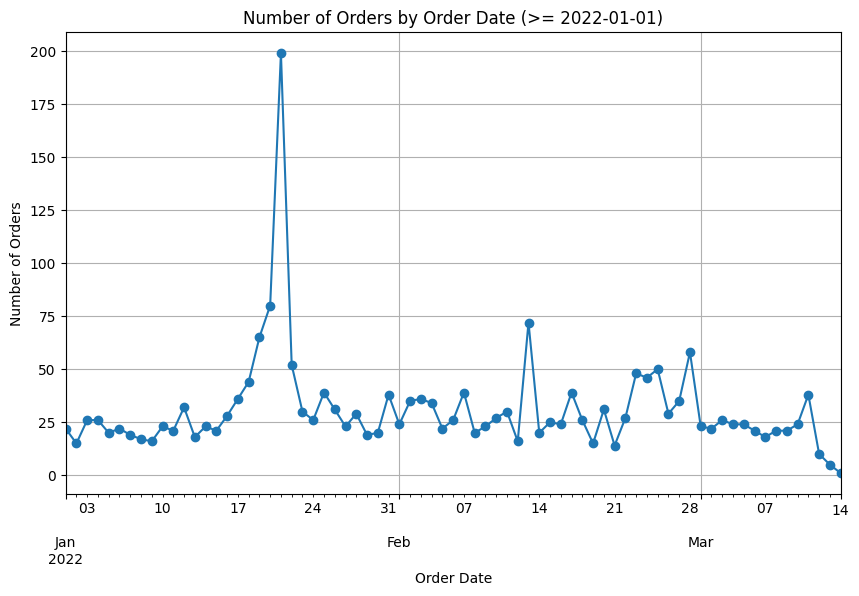

In [11]:
# Filter orders with order_date >= '2022-01-01'
orders_df_2022 = orders_df[orders_df['order_date'] >= '2022-01-01']

# Plot 2022 values number of orders by order date
orders_df_2022.groupby('order_date')['id'].count().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Number of Orders by Order Date (>= 2022-01-01)')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

In [12]:
# Number of orders per day in outliar period
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])
orders_df_jan_2022 = orders_df[(orders_df['order_date'] >= '2022-01-15') & (orders_df['order_date'] <= '2022-01-24')]
orders_df_jan_2022 = orders_df_jan_2022.groupby('order_date')['id'].count()
orders_df_jan_2022

order_date
2022-01-15     21
2022-01-16     28
2022-01-17     36
2022-01-18     44
2022-01-19     65
2022-01-20     80
2022-01-21    199
2022-01-22     52
2022-01-23     30
2022-01-24     26
Name: id, dtype: int64

There is a peaky in orders between 2022-01-15 and 2022-01-24. The outlier value of 2022-01-21 is not going to be removed since it can be due to seasonality (i.e. sales in grocery store in that period, event in the city, etc) that can be repeated. 

2. Number of items per order

In [13]:
items_per_order = orders_df.groupby('id')['ordered_items'].apply(lambda x: sum(len(item) for item in x)).reset_index(name='num_items')
items_per_order_sorted = items_per_order.sort_values(by='num_items', ascending=False)
items_per_order_sorted.head(20)


,id,num_items
6651,3947934548100,114
3986,3822639513732,71
2805,3730902712452,70
3144,3752334098564,68
776,2888290697348,67
1359,2925036404868,67
520,2845041393796,64
2468,3706182467716,64
3821,3809078837380,58
2064,3679233245316,57


Let's analyze the distribution of number of items per order

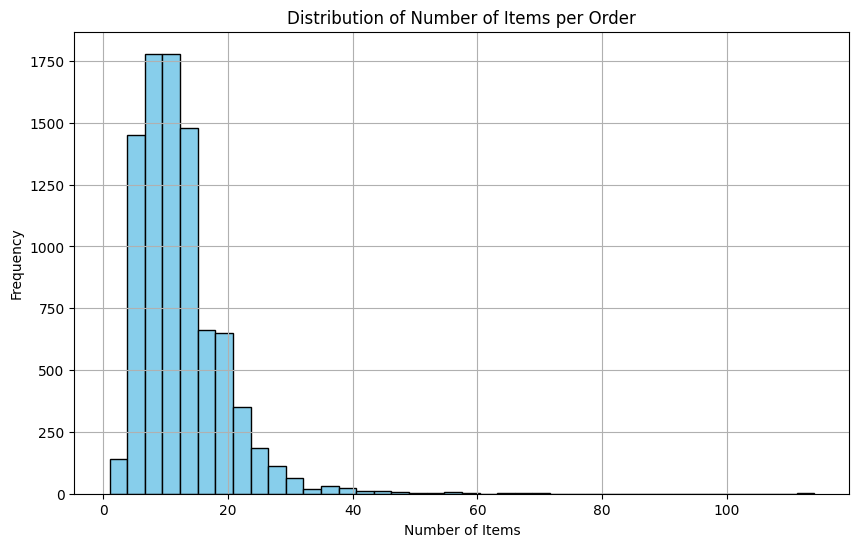

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(items_per_order_sorted['num_items'], bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

We also obtain basic statistical information to understand the distribution

In [15]:
stat_info = items_per_order_sorted['num_items'].describe()
most_repeated_value = items_per_order_sorted['num_items'].mode()

print("Basic Statistical Information:")
print(stat_info)
print("\nMost Repeated Value:")
print(most_repeated_value)

Basic Statistical Information:
count    8773.000000
mean       12.305711
std         6.839507
min         1.000000
25%         8.000000
50%        11.000000
75%        15.000000
max       114.000000
Name: num_items, dtype: float64

Most Repeated Value:
0    10
Name: num_items, dtype: int64


3. Number of orders and number of items per user_id. Lets plot the user_ids in a scatter plot to see the distribution between number of orders and number of items

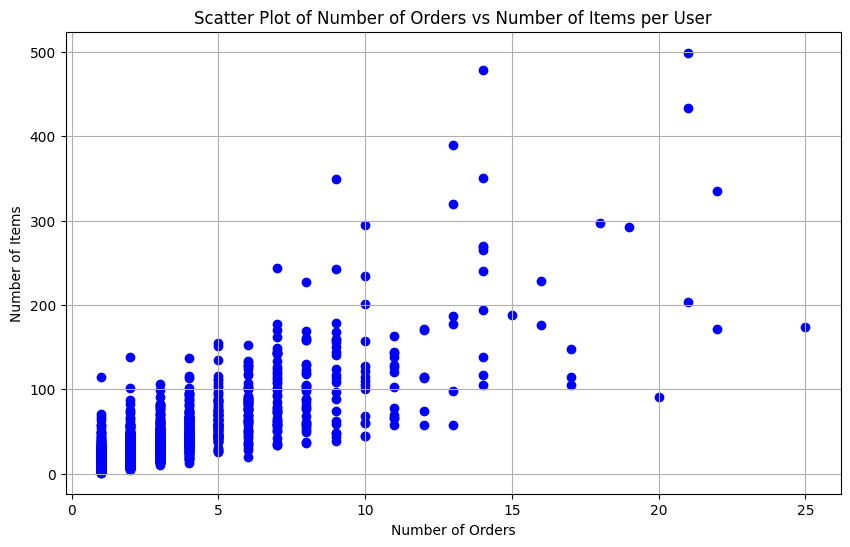

In [16]:
orders_per_user = orders_df.groupby('user_id').agg(num_orders=('id', 'count'), num_items=('ordered_items', lambda x: sum(len(item) for item in x))).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(orders_per_user['num_orders'], orders_per_user['num_items'], color='blue')

plt.title('Scatter Plot of Number of Orders vs Number of Items per User')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Items')
plt.grid(True)
plt.show()

We can use this later to segment the customers by number of times they buy and the amount of products they take

REGULARS:
1. Are regular items the most frequently item bought by users?
We are joining orders_df and regulars_df to try to answer this question

In [17]:
# Perform a left join between orders_df and regulars_df on the 'user_id' column
orders_vs_regular_df = pd.merge(orders_df, regulars_df[['user_id', 'variant_id']], on='user_id', how='left')
orders_vs_regular_df.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items,variant_id
0,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045...",3.361891e+13
1,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045...",3.361898e+13
2,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045...",3.361886e+13
3,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045...",3.361887e+13
4,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045...",3.361890e+13


In [18]:
# 1. Count how many variant_id are per user_id and see if we have null values
orders_vs_regular_df['regular_items'] = orders_vs_regular_df.groupby('user_id')['variant_id'].transform(lambda x: list(x))

print(f"Orders with no regular items: {orders_vs_regular_df['regular_items'].isnull().sum()}")
print(f"Orders with regular items: {orders_vs_regular_df['regular_items'].notnull().sum()}")

Orders with no regular items: 4748
Orders with regular items: 80176


Since I want to analyze the frecuency of regular products, I will remove null values. Null values do not give me any information

In [19]:
orders_vs_regular_df.dropna(subset=['regular_items'], inplace=True)
print(f"Orders with no regular items: {orders_vs_regular_df['regular_items'].isnull().sum()}")
print(f"Orders with regular items: {orders_vs_regular_df['regular_items'].notnull().sum()}")

Orders with no regular items: 0
Orders with regular items: 80176


In [20]:
# 2. New dataset grouped by user_id and id
grouped_df = orders_vs_regular_df.groupby(['user_id', 'id']).agg({
    'ordered_items': lambda x: list(x),
    'regular_items': lambda x: list(x)
}).reset_index()

grouped_df

,user_id,id,ordered_items,regular_items
0,004b3e3cb9a9f5b0974ce4179db394057c72e7a82077bf...,3927552688260,"[[33667265855620, 34037939437700, 341373892363...",[33667274997892.0]
1,004b3e3cb9a9f5b0974ce4179db394057c72e7a82077bf...,3933370482820,"[[34198503129220, 34284951273604, 342849519617...",[33667274997892.0]
2,004b3e3cb9a9f5b0974ce4179db394057c72e7a82077bf...,3970001010820,"[[33826430648452, 34037939437700, 341373894329...",[33667274997892.0]
3,005743eefffa4ce840608c4f47b8c548b134d89be5c390...,3732136067204,"[[34081589887108, 34519123951748, 345191239517...","[34081589887108.0, 34519123951748.0]"
4,0074992079c1836c6509eec748a973dc97388b4877e770...,2262514729092,"[[33667289514116, 33667293085828, 336672930858...","[33667222896772.0, 33826414526596.0, 338264136..."
...,...,...,...,...
4020,fffd9f989509e36d1fc3e3e53627d6341482f385052a03...,3911467401348,"[[33826432188548, 33826432548996, 342765703333...","[33826413019268.0, 34465293402244.0, 395902665..."
4021,fffd9f989509e36d1fc3e3e53627d6341482f385052a03...,3934888919172,"[[34465293107332, 34465293336708, 344652933367...","[33826413019268.0, 34465293402244.0, 395902665..."
4022,fffd9f989509e36d1fc3e3e53627d6341482f385052a03...,3962156253316,"[[34317850116228, 34465293107332, 344652939265...","[33826413019268.0, 34465293402244.0, 395902665..."
4023,fffd9f989509e36d1fc3e3e53627d6341482f385052a03...,3978608115844,"[[34465293107332, 34465293336708, 344652933367...","[33826413019268.0, 34465293402244.0, 395902665..."


In [21]:
# Calculate the number of regular products that appear in every order by customer
grouped_df['percentage_regular_items_in_order'] = 0

for i in range(len(grouped_df)):
    regulars_in_order = 0
    total_regular_items = len(grouped_df['regular_items'].iloc[i])

    for regular_item in grouped_df['regular_items'].iloc[i]:
        if regular_item in grouped_df['ordered_items'].iloc[i][0]:
            regulars_in_order += 1

    if total_regular_items > 0:
        grouped_df.at[i, 'percentage_regular_items_in_order'] = regulars_in_order / total_regular_items
    else:
        grouped_df.at[i, 'percentage_regular_items_in_order'] = 0

grouped_df.head()


/tmp/ipykernel_2226/2198502452.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5416666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped_df.at[i, 'percentage_regular_items_in_order'] = regulars_in_order / total_regular_items


,user_id,id,ordered_items,regular_items,percentage_regular_items_in_order
0,004b3e3cb9a9f5b0974ce4179db394057c72e7a82077bf...,3927552688260,"[[33667265855620, 34037939437700, 341373892363...",[33667274997892.0],0.000000
1,004b3e3cb9a9f5b0974ce4179db394057c72e7a82077bf...,3933370482820,"[[34198503129220, 34284951273604, 342849519617...",[33667274997892.0],0.000000
2,004b3e3cb9a9f5b0974ce4179db394057c72e7a82077bf...,3970001010820,"[[33826430648452, 34037939437700, 341373894329...",[33667274997892.0],0.000000
3,005743eefffa4ce840608c4f47b8c548b134d89be5c390...,3732136067204,"[[34081589887108, 34519123951748, 345191239517...","[34081589887108.0, 34519123951748.0]",1.000000
4,0074992079c1836c6509eec748a973dc97388b4877e770...,2262514729092,"[[33667289514116, 33667293085828, 336672930858...","[33667222896772.0, 33826414526596.0, 338264136...",0.541667


In [22]:
grouped_df['percentage_regular_items_in_order'].describe()

count    4025.000000
mean        0.414919
std         0.370391
min         0.000000
25%         0.083333
50%         0.333333
75%         0.714286
max         1.000000
Name: percentage_regular_items_in_order, dtype: float64

2. Frequency to buy regular items by user

In [23]:
# Group by user_id and calculate the mean value of percentage
user_regular_percentage_df = grouped_df.groupby('user_id').agg({
    'percentage_regular_items_in_order': np.mean
}).reset_index()

user_regular_percentage_df.head()

/tmp/ipykernel_2226/344451023.py:2: FutureWarning: The provided callable <function mean at 0x7fb6e021c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  user_regular_percentage_df = grouped_df.groupby('user_id').agg({


,user_id,percentage_regular_items_in_order
0,004b3e3cb9a9f5b0974ce4179db394057c72e7a82077bf...,0.000000
1,005743eefffa4ce840608c4f47b8c548b134d89be5c390...,1.000000
2,0074992079c1836c6509eec748a973dc97388b4877e770...,0.541667
3,00ecced73edb11d4bab08e794656dcf9d9b89ea89c5918...,0.666667
4,014301579c18e7c7f034e544ab3d4ee235ef2de43ee5db...,0.300000


Let's plot the distribution of the percentage of regular items buy by each user

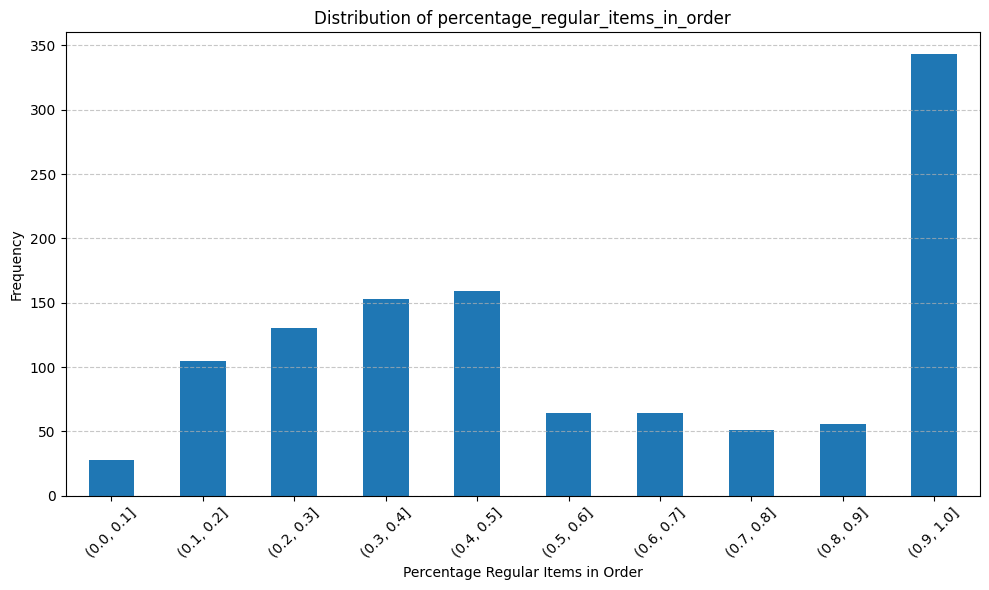

In [24]:
# Group data in 10% bins
bins = np.arange(0, 1.1, 0.1)
distribution = pd.cut(user_regular_percentage_df['percentage_regular_items_in_order'], bins=bins).value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
distribution.plot(kind='bar')
plt.title('Distribution of percentage_regular_items_in_order')
plt.xlabel('Percentage Regular Items in Order')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


We can say that customers buy their regular products quite often

INVENTORY:
1. Most selled products
2. What product_type is selled most?
3. Items bought together

USERS:
1. Which user_segment spend most and in how many orders?
2. Does users individually behave as their user segment based on previous question?

I would also try to respond the above questions, but, due to lack of time, I will continue with the rest of the assesment.

# 2. Exploratory Data Analysis

In [27]:
local_file_path = '/home/ebacigalupe/zrive-ds/zrive-ds/feature_frame.csv'  

feature_frame = pd.read_csv(local_file_path)

feature_frame.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


#### 1. Do all the quick checks and find any potential issues with the data. Fix them as you see fit.

In [28]:
print("FEATURE_FRAME")
print('1. Shape and size of feature_frame \n{}: {}'.format(feature_frame.shape, ', '.join(feature_frame.columns)), f"\n")

print(f"2. Data types: \n")
null_values = feature_frame.info()

unique_users = len(feature_frame['user_id'].unique())
unique_orders = len(feature_frame['order_id'].unique())
unique_products = len(feature_frame['variant_id'].unique())


FEATURE_FRAME
1. Shape and size of feature_frame 
(2880549, 27): variant_id, product_type, order_id, user_id, created_at, order_date, user_order_seq, outcome, ordered_before, abandoned_before, active_snoozed, set_as_regular, normalised_price, discount_pct, vendor, global_popularity, count_adults, count_children, count_babies, count_pets, people_ex_baby, days_since_purchase_variant_id, avg_days_to_buy_variant_id, std_days_to_buy_variant_id, days_since_purchase_product_type, avg_days_to_buy_product_type, std_days_to_buy_product_type 

2. Data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5

In [29]:
print(f"3. Null values: \n")
null_counts = feature_frame.isnull().sum()
print(null_counts)

print(f"\n", f"4. Total of {unique_orders}", f"orders made by {unique_users}", "unique users", f"including {unique_products}", "unique products")

3. Null values: 

variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type    

#### 2. Do all he data integrity checks and understand the shape of your data.


Let's analyze again the number of orders over the time

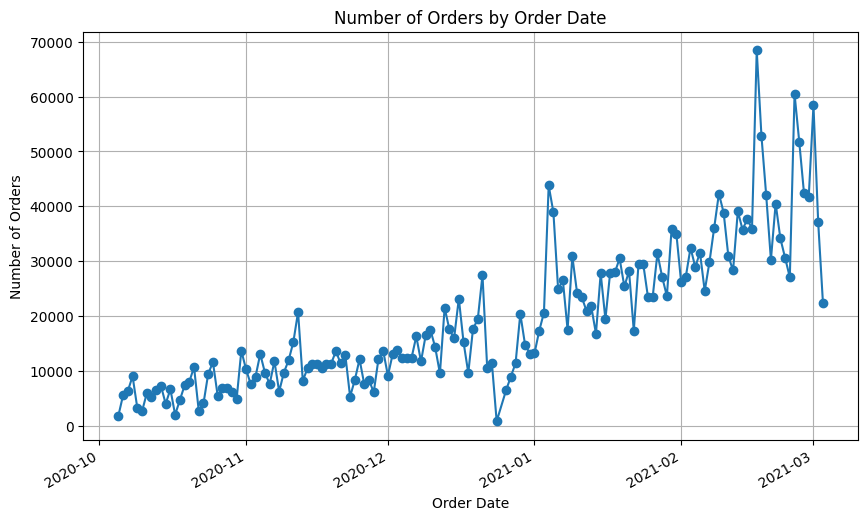

In [30]:
feature_frame['order_date'] = pd.to_datetime(feature_frame['order_date'])
feature_frame.groupby('order_date')['order_id'].count().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Number of Orders by Order Date')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

Despite there are some peaks in the graph, the data seems to be following a trend.

Now, let's plot the distribution of products per order:

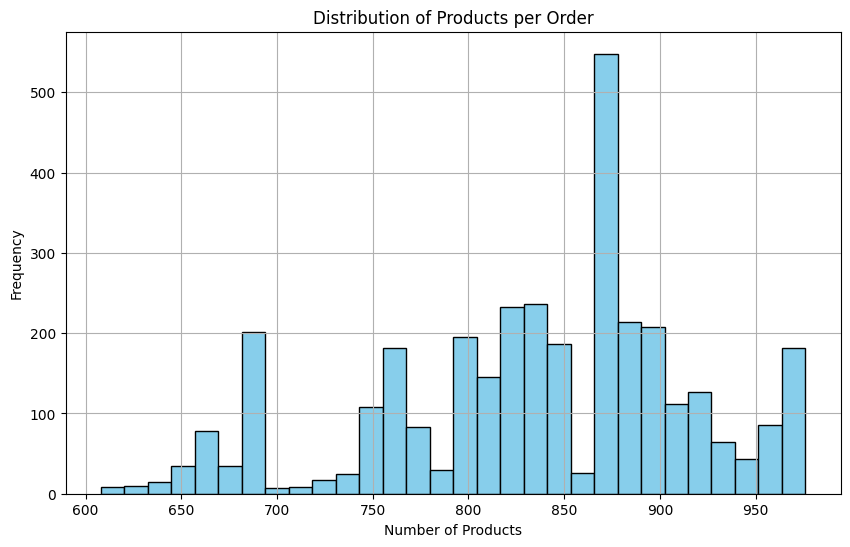

In [31]:
products_per_order = feature_frame.groupby('order_id')['variant_id'].count()

plt.figure(figsize=(10, 6))
plt.hist(products_per_order, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Products per Order')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Seems to be a large number of products per order. The distribution is wavy. It can be due to natural variability of the data (customer behaviour). It can be insteresting to have those peaks in number of products per order since we wil be able to predict high selling periods or anticipate to refill stock.

We can also obtain basic statistical information to understand the distribution:

In [32]:
stat_info = products_per_order.describe()

most_repeated_value = products_per_order.mode()

print("Basic Statistical Information:")
print(stat_info)
print("\nMost Repeated Value:")
print(most_repeated_value)

Basic Statistical Information:
count    3446.000000
mean      835.910911
std        81.741761
min       608.000000
25%       794.000000
50%       847.000000
75%       885.000000
max       976.000000
Name: variant_id, dtype: float64

Most Repeated Value:
0    877
Name: variant_id, dtype: int64


As before, we can analyze the number of orders and number of items per user_id by plotting those metrics to see the user distribution. 


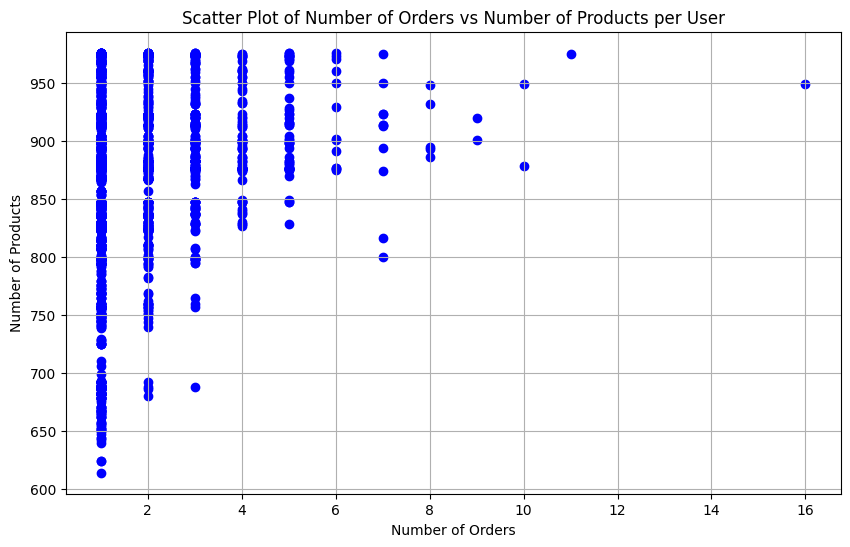

In [33]:
orders_per_user = feature_frame.groupby('user_id').agg(num_orders=('order_id', 'nunique'), num_products=('variant_id', 'nunique')).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(orders_per_user['num_orders'], orders_per_user['num_products'], color='blue')

plt.title('Scatter Plot of Number of Orders vs Number of Products per User')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()

The distribution changes compared to datasets from exercise one. It can be seen that most of users that buy a large amount of products thay do it in few orders. The user that tend to buy more often (more number of orders) also tend to make smaller orders. 

To show the correlation between Number of Orders and Number of Products per User can be relevant:

In [37]:
correlation = orders_per_user['num_orders'].corr(orders_per_user['num_products'])
print("Correlation between Number of Orders and Number of Products per User:", correlation)

Correlation between Number of Orders and Number of Products per User: 0.2310344782195647


In [43]:
# Convert non-numeric columns to numeric using one-hot encoding
feature_frame_numeric = pd.get_dummies(feature_frame)

# Drop the 'ricepastapulses' column if it exists
if 'ricepastapulses' in feature_frame_numeric.columns:
    feature_frame_numeric.drop(columns=['ricepastapulses'], inplace=True)

# Compute the correlation matrix
correlation_matrix = feature_frame_numeric.corr()

print("Correlation Matrix:")
print(correlation_matrix)



: 